In [9]:
###############################################################################
# Purpose:
#   This section brings in the Word Dictionary to get the length of features. 
#   The dataframse is being created and checked to ensure both the training
#   and test frames have the same number of features.
###############################################################################
###############################################################################
# (a) Try to load the training and test data into data frames in Python.
###############################################################################
import pandas as pd
import numpy as np
from sklearn.datasets import load_svmlight_file
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import CountVectorizer

# Pulling in the Word Dictionary from the assignment
df = pd.read_csv("words.map.txt", sep = "\t")
np.array(df)

def readCsrData(filename):
  with open(filename) as datafile:
    count=0
    col=[len(df)-1]
    row=[0]
    data=[0]
    y=[]
    for line in datafile:

      # Split your line into a list of words deliminated by the space.
      elements = line.split(' ')
      
      # Read the very first element and the remaining ones as strings.
      label, features = elements[0], elements[1:]
      
      #######################################################################
      # Just for example purpose: 
      #   - If you would like to read the first feature element as integers,
      #   - Please remove the following three lines for your main submission.
      yA = [float(label)]
      colA = [i.split(':', 1)[0] for i in elements[1:]]
      colA = [int(x) - 1 for x in colA]
      dataA = [i.split(':', 1)[1] for i in elements[1:]]
      dataA = [float(x) for x in dataA]
      rowA = [count]*(len(colA))
      col = col + colA
      data = data + dataA
      row = row + rowA
      y = y + yA
      count += 1
      #break
      #######################################################################
    #print(col)
    #print(row)
    #print(data)
    y = np.array(y)
    X = (csr_matrix((data, (row, col))))
    #print(X)
    #print(y)

    return X,y

X_train, y_train = readCsrData('articles.train')
X_test, y_test = readCsrData('articles.test')

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(4000, 61187)
(4000,)
(2400, 61187)
(2400,)


In [11]:
###############################################################################
# Purpose:
#   This section creates each of the y_train and y_test arrays such that each 
#   class has its own array with '1' for the class of interest and '-1' for 
#   all the other classes. There are multiple prints at the end to verify.
###############################################################################
###############################################################################
# (b) First, train four different (hard-margin) linear classifiers.
###############################################################################
import pandas as pd
import numpy as np
from sklearn.datasets import load_svmlight_file
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import CountVectorizer

X_train_dense = X_train.todense()
X_test_dense = X_test.todense()

y_train_O = np.array([1 if x==1 else -1 for x in y_train])
y_train_V = np.array([1 if x==2 else -1 for x in y_train])
y_train_S = np.array([1 if x==3 else -1 for x in y_train])
y_train_P = np.array([1 if x==4 else -1 for x in y_train])

y_test_O = np.array([1 if x==1 else -1 for x in y_test])
y_test_V = np.array([1 if x==2 else -1 for x in y_test])
y_test_S = np.array([1 if x==3 else -1 for x in y_test])
y_test_P = np.array([1 if x==4 else -1 for x in y_test])

print(X_train_dense.shape)
print(X_test_dense.shape)

print(X_train[0:, 0:])
print(y_train[0:])

print(y_train_O[0:])
print(y_train_S[0:])
print(y_train_V[0:])
print(y_train_P[0:])

print(X_test[0:, 0:])
print(y_test)

print(y_test_O[0:])
print(y_test_S[0:])
print(y_test_V[0:])
print(y_test_P[0:])

print(X_train_dense)

(4000, 61187)
(2400, 61187)
  (0, 10)	2.0
  (0, 11)	6.0
  (0, 12)	1.0
  (0, 22)	12.0
  (0, 24)	1.0
  (0, 26)	2.0
  (0, 27)	1.0
  (0, 28)	8.0
  (0, 29)	4.0
  (0, 32)	2.0
  (0, 37)	1.0
  (0, 47)	1.0
  (0, 48)	1.0
  (0, 59)	3.0
  (0, 80)	5.0
  (0, 99)	3.0
  (0, 103)	3.0
  (0, 121)	3.0
  (0, 124)	2.0
  (0, 140)	1.0
  (0, 142)	1.0
  (0, 143)	5.0
  (0, 228)	1.0
  (0, 234)	2.0
  (0, 238)	1.0
  :	:
  (3999, 8935)	1.0
  (3999, 9291)	1.0
  (3999, 11317)	1.0
  (3999, 11353)	2.0
  (3999, 13584)	1.0
  (3999, 15216)	1.0
  (3999, 22522)	1.0
  (3999, 23310)	1.0
  (3999, 27608)	1.0
  (3999, 31930)	1.0
  (3999, 33311)	1.0
  (3999, 37131)	1.0
  (3999, 41457)	1.0
  (3999, 44460)	1.0
  (3999, 45514)	4.0
  (3999, 46529)	1.0
  (3999, 46901)	1.0
  (3999, 46902)	1.0
  (3999, 49498)	3.0
  (3999, 50583)	1.0
  (3999, 51016)	2.0
  (3999, 51856)	1.0
  (3999, 51857)	2.0
  (3999, 51947)	1.0
  (3999, 51948)	1.0
[1. 1. 1. ... 4. 4. 4.]
[ 1  1  1 ... -1 -1 -1]
[-1 -1 -1 ... -1 -1 -1]
[-1 -1 -1 ... -1 -1 -1]
[-1 -1 -1 ..

In [12]:
###############################################################################
# Purpose:
#   This section runs svm for each class, with hard-margin.
#   There are accuracy, precision, and recall performance measures output
#   for each class svm run.
###############################################################################
###############################################################################
# (b) Operating Systems classification
###############################################################################
X = X_train
y = y_train_O

from sklearn import svm # "Support vector classifier"
model = svm.SVC(kernel='linear',C=1E10)
model.fit(X, y)

y_pred_O = model.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_O, y_pred_O))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test_O, y_pred_O))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test_O, y_pred_O))


###############################################################################
# (b) Vehicles classification
###############################################################################
X = X_train
y = y_train_V

from sklearn import svm # "Support vector classifier"
model = svm.SVC(kernel='linear',C=1E10)
model.fit(X, y)

y_pred_V = model.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_V, y_pred_V))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test_V, y_pred_V))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test_V, y_pred_V))


###############################################################################
# (b) Sports classification
###############################################################################
X = X_train
y = y_train_S

from sklearn import svm # "Support vector classifier"
model = svm.SVC(kernel='linear',C=1E10)
model.fit(X, y)

y_pred_S = model.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_S, y_pred_S))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test_S, y_pred_S))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test_S, y_pred_S))


###############################################################################
# (b) Politics classification
###############################################################################
X = X_train
y = y_train_P

from sklearn import svm # "Support vector classifier"
model = svm.SVC(kernel='linear',C=1E10)
model.fit(X, y)

y_pred_P = model.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_P, y_pred_P))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test_P, y_pred_P))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test_P, y_pred_P))

Accuracy: 0.9579166666666666
Precision: 0.9681050656660413
Recall: 0.86
Accuracy: 0.9341666666666667
Precision: 0.8946428571428572
Recall: 0.835
Accuracy: 0.9491666666666667
Precision: 0.9192982456140351
Recall: 0.8733333333333333
Accuracy: 0.9408333333333333
Precision: 0.9045936395759717
Recall: 0.8533333333333334


In [13]:
###############################################################################
# Purpose:
#   This section splits the training data 75/25 and then runs svm for each
#   class, with soft-margin. The C parameter is looped through between, with
#   the best C value is printed along with accuracy measurements.
#
#   The best C parameter value:
#       Operating Systems: 0.125
#       Vehicles: 0.25
#       Sports: 2
#       Politics: 0.25
#
#   Best average C parameter overall: 0.125
###############################################################################
###############################################################################
# (c) Soft-margin linear classifiers with different C values.
###############################################################################
from sklearn import svm # "Support vector classifier"
from sklearn.model_selection import train_test_split
X_train_C, X_test_C, y_train_C, y_test_C = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

y_train_C_O = np.array([1 if x==1 else -1 for x in y_train_C])
y_train_C_V = np.array([1 if x==2 else -1 for x in y_train_C])
y_train_C_S = np.array([1 if x==3 else -1 for x in y_train_C])
y_train_C_P = np.array([1 if x==4 else -1 for x in y_train_C])

y_test_C_O = np.array([1 if x==1 else -1 for x in y_test_C])
y_test_C_V = np.array([1 if x==2 else -1 for x in y_test_C])
y_test_C_S = np.array([1 if x==3 else -1 for x in y_test_C])
y_test_C_P = np.array([1 if x==4 else -1 for x in y_test_C])

##########################
# For Operating Systems
##########################
best_C = None
best_score_O = 0
accuracy_O=[]
for C in (0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512):
    model = svm.SVC(kernel='linear', C=C)
    model.fit(X_train_C, y_train_C_O)
    score = model.score(X_test_C, y_test_C_O)
    accuracy_O = accuracy_O + [score]
    if score > best_score_O:
        best_score_O = score
        best_C = C
print('Highest Accuracy Score: ', best_score_O)  
print(best_C)
print(accuracy_O)

##########################
# For Vehicles
##########################
best_C = None
best_score_V = 0
accuracy_V=[]
for C in (0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512):
    model = svm.SVC(kernel='linear', C=C)
    model.fit(X_train_C, y_train_C_V)
    score = model.score(X_test_C, y_test_C_V)
    accuracy_V = accuracy_V + [score]
    if score > best_score_V:
        best_score_V = score
        best_C = C
print('Highest Accuracy Score: ', best_score_V)  
print(best_C)
print(accuracy_V)

##########################
# For Sports
##########################
best_C = None
best_score_S = 0
accuracy_S=[]
for C in (0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512):
    model = svm.SVC(kernel='linear', C=C)
    model.fit(X_train_C, y_train_C_S)
    score = model.score(X_test_C, y_test_C_S)
    accuracy_S = accuracy_S + [score]
    if score > best_score_S:
        best_score_S = score
        best_C = C
print('Highest Accuracy Score: ', best_score_S)  
print(best_C)
print(accuracy_S)

##########################
# For Politics
##########################
best_C = None
best_score_P = 0
accuracy_P=[]
for C in (0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512):
    model = svm.SVC(kernel='linear', C=C)
    model.fit(X_train_C, y_train_C_P)
    score = model.score(X_test_C, y_test_C_P)
    accuracy_P = accuracy_P + [score]
    if score > best_score_P:
        best_score_P = score
        best_C = C
print('Highest Accuracy Score: ', best_score_P)  
print(best_C)
print(accuracy_P)


average_accuracy_C = [(w + x + y + z) / 4 for w,x,y,z in zip(accuracy_O,accuracy_V,accuracy_S,accuracy_P)]
print(average_accuracy_C)
best_average_accuracy_C = max(average_accuracy_C)
print(best_average_accuracy_C)

Highest Accuracy Score:  0.969
0.125
[0.969, 0.965, 0.959, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96]
Highest Accuracy Score:  0.962
0.25
[0.961, 0.962, 0.96, 0.96, 0.959, 0.959, 0.959, 0.959, 0.959, 0.959, 0.959, 0.959, 0.959]
Highest Accuracy Score:  0.977
2
[0.974, 0.973, 0.974, 0.976, 0.977, 0.977, 0.977, 0.977, 0.977, 0.977, 0.977, 0.977, 0.977]
Highest Accuracy Score:  0.978
0.25
[0.976, 0.978, 0.978, 0.978, 0.978, 0.978, 0.978, 0.978, 0.978, 0.978, 0.978, 0.978, 0.978]
[0.97, 0.9695, 0.9677499999999999, 0.9684999999999999, 0.9684999999999999, 0.9684999999999999, 0.9684999999999999, 0.9684999999999999, 0.9684999999999999, 0.9684999999999999, 0.9684999999999999, 0.9684999999999999, 0.9684999999999999]
0.97


Highest Accuracy Score:  1.0
0.25
[0.9996666666666667, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Highest Accuracy Score:  1.0
1
[0.999, 0.9996666666666667, 0.9996666666666667, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Highest Accuracy Score:  1.0
0.5
[0.999, 0.9993333333333333, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Highest Accuracy Score:  1.0
0.25
[0.9996666666666667, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.031 0.035 0.041 0.04  0.04  0.04  0.04  0.04  0.04  0.04  0.04  0.04
 0.04 ]
[0.00033333 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
[-3. -2. -1.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]


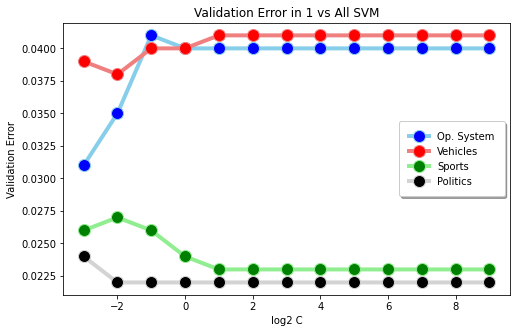

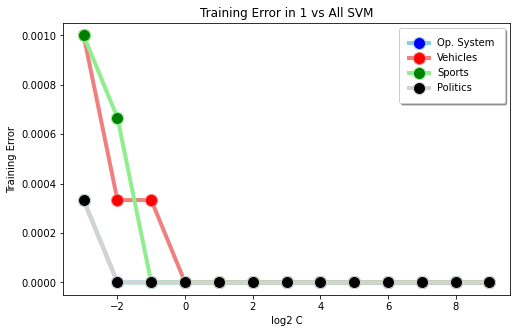

In [14]:
###############################################################################
# Purpose:
#   This section produces the data needed around training errors associated with
#   the range of C parameter values. This information is used for the plot in 
#   section c.
# 
#   There are plots for the training error and test error.
###############################################################################
#Part C, finding best C
#Training Accuracy
X = X_train_C
y = y_train_C_O

best_C = None
best_score_O = 0
Taccuracy_O=[]
for C in (0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512):
    model = svm.SVC(kernel='linear', C=C)
    model.fit(X_train_C, y_train_C_O)
    score = model.score(X_train_C, y_train_C_O)
    Taccuracy_O = Taccuracy_O + [score]
    if score > best_score_O:
        best_score_O = score
        best_C = C
print('Highest Accuracy Score: ', best_score_O)  
print(best_C)
print(Taccuracy_O)

X = X_train_C
y = y_train_C_V

best_C = None
best_score_V = 0
Taccuracy_V=[]
for C in (0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512):
    model = svm.SVC(kernel='linear', C=C)
    model.fit(X_train_C, y_train_C_V)
    score = model.score(X_train_C, y_train_C_V)
    Taccuracy_V = Taccuracy_V + [score]
    if score > best_score_V:
        best_score_V = score
        best_C = C
print('Highest Accuracy Score: ', best_score_V)  
print(best_C)
print(Taccuracy_V)

X = X_train_C
y = y_train_C_S

best_C = None
best_score_S = 0
Taccuracy_S=[]
for C in (0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512):
    model = svm.SVC(kernel='linear', C=C)
    model.fit(X_train_C, y_train_C_S)
    score = model.score(X_train_C, y_train_C_S)
    Taccuracy_S = Taccuracy_S + [score]
    if score > best_score_S:
        best_score_S = score
        best_C = C
print('Highest Accuracy Score: ', best_score_S)  
print(best_C)
print(Taccuracy_S)

X = X_train_C
y = y_train_C_P

best_C = None
best_score_P = 0
Taccuracy_P=[]
for C in (0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512):
    model = svm.SVC(kernel='linear', C=C)
    model.fit(X_train_C, y_train_C_P)
    score = model.score(X_train_C, y_train_C_P)
    Taccuracy_P = Taccuracy_P + [score]
    if score > best_score_P:
        best_score_P = score
        best_C = C
print('Highest Accuracy Score: ', best_score_P)  
print(best_C)
print(Taccuracy_P)

#########################################################
# Validation Error for various C values
#########################################################
Err_O = 1- np.array(accuracy_O)
Err_V = 1- np.array(accuracy_V)
Err_S = 1- np.array(accuracy_S)
Err_P = 1- np.array(accuracy_P)

print(Err_O)

#########################################################
# Training Error for various C values
#########################################################
TErr_O = 1- np.array(Taccuracy_O)
TErr_V = 1- np.array(Taccuracy_V)
TErr_S = 1- np.array(Taccuracy_S)
TErr_P = 1- np.array(Taccuracy_P)

print(TErr_O)

#########################################################
# Create X axis for plotting consisting of log2 C values
#########################################################
C_Axis = np.array([0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512])
Log_C_Axis = np.log2(C_Axis)

print(Log_C_Axis)


#########################################################
# Real Part C Plotting Validation Error
#########################################################
import matplotlib.pyplot as plt
import numpy as np

plt.figure(num = 3, figsize=(8, 5))
#plt.plot(C_Axis, y2)
plt.plot( Log_C_Axis, Err_O, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4, label="Op. System")
plt.plot( Log_C_Axis, Err_V, marker='o', markerfacecolor='red', markersize=12, color='lightcoral', linewidth=4, label="Vehicles")
plt.plot( Log_C_Axis, Err_S, marker='o', markerfacecolor='green', markersize=12, color='lightgreen', linewidth=4, label="Sports")
plt.plot( Log_C_Axis, Err_P, marker='o', markerfacecolor='black', markersize=12, color='lightgray', linewidth=4, label="Politics")

plt.xlabel("log2 C")
plt.ylabel("Validation Error")
plt.title("Validation Error in 1 vs All SVM")
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)

plt.show()


#########################################################
# Plotting Training Error
#########################################################
plt.figure(num = 3, figsize=(8, 5))
plt.plot( Log_C_Axis, TErr_O, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4, label="Op. System")
plt.plot( Log_C_Axis, TErr_V, marker='o', markerfacecolor='red', markersize=12, color='lightcoral', linewidth=4, label="Vehicles")
plt.plot( Log_C_Axis, TErr_S, marker='o', markerfacecolor='green', markersize=12, color='lightgreen', linewidth=4, label="Sports")
plt.plot( Log_C_Axis, TErr_P, marker='o', markerfacecolor='black', markersize=12, color='lightgray', linewidth=4, label="Politics")

plt.xlabel("log2 C")
plt.ylabel("Training Error")
plt.title("Training Error in 1 vs All SVM")
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)

plt.show()

In [15]:
###############################################################################
# Purpose:
#   This section runs svm for each class, with soft-margin.
#   There are accuracy, precision, and recall performance measures output
#   for each class svm run.
#
#   The first runs each class with each class's best C parameter value.
#   The second runs each class with the overall best C parameter value.
#
#   The soft-margin classifier appears to work better since its accuracy on the
#   test portion of the data has higher accuracy than was seen with hard-margin.
###############################################################################

###############################################################################
# (d) Best C value chosen, learn four soft-margin classifiers on entire training set.
###############################################################################

###############################################################################
###############################################################################
# Operating Systems - using its best C parameter value
###############################################################################
X = X_train
y = y_train_O

from sklearn import svm # "Support vector classifier"
model = svm.SVC(kernel='linear',C=0.125)
model.fit(X, y)

y_pred_O = model.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_O, y_pred_O))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test_O, y_pred_O))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test_O, y_pred_O))

###############################################################################
# Vehicles - using its best C parameter value
###############################################################################
X = X_train
y = y_train_V

from sklearn import svm # "Support vector classifier"
model = svm.SVC(kernel='linear',C=0.25)
model.fit(X, y)

y_pred_V = model.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_V, y_pred_V))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test_V, y_pred_V))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test_V, y_pred_V))

###############################################################################
# Sports - using its best C parameter value
###############################################################################
X = X_train
y = y_train_S

from sklearn import svm # "Support vector classifier"
model = svm.SVC(kernel='linear',C=2)
model.fit(X, y)

y_pred_S = model.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_S, y_pred_S))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test_S, y_pred_S))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test_S, y_pred_S))

###############################################################################
# Politics - using its best C parameter value
###############################################################################
X = X_train
y = y_train_P

from sklearn import svm # "Support vector classifier"
model = svm.SVC(kernel='linear',C=0.25)
model.fit(X, y)

y_pred_P = model.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_P, y_pred_P))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test_P, y_pred_P))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test_P, y_pred_P))


###############################################################################
###############################################################################
# Operating Systems - using the overall best C parameter value
###############################################################################
X = X_train
y = y_train_O

from sklearn import svm # "Support vector classifier"
model = svm.SVC(kernel='linear',C=0.125)
model.fit(X, y)

y_pred_O = model.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_O, y_pred_O))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test_O, y_pred_O))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test_O, y_pred_O))

###############################################################################
# Vehicles - using the overall best C parameter value
###############################################################################
X = X_train
y = y_train_V

from sklearn import svm # "Support vector classifier"
model = svm.SVC(kernel='linear',C=0.125)
model.fit(X, y)

y_pred_V = model.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_V, y_pred_V))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test_V, y_pred_V))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test_V, y_pred_V))

###############################################################################
# Sports - using the overall best C parameter value
###############################################################################
X = X_train
y = y_train_S

from sklearn import svm # "Support vector classifier"
model = svm.SVC(kernel='linear',C=0.125)
model.fit(X, y)

y_pred_S = model.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_S, y_pred_S))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test_S, y_pred_S))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test_S, y_pred_S))

###############################################################################
# Politics - using the overall best C parameter value
###############################################################################
X = X_train
y = y_train_P

from sklearn import svm # "Support vector classifier"
model = svm.SVC(kernel='linear',C=0.125)
model.fit(X, y)

y_pred_P = model.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_P, y_pred_P))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test_P, y_pred_P))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test_P, y_pred_P))

Accuracy: 0.9616666666666667
Precision: 0.9792452830188679
Recall: 0.865
Accuracy: 0.9433333333333334
Precision: 0.9202898550724637
Recall: 0.8466666666666667
Accuracy: 0.9491666666666667
Precision: 0.9192982456140351
Recall: 0.8733333333333333
Accuracy: 0.9416666666666667
Precision: 0.9078014184397163
Recall: 0.8533333333333334
Accuracy: 0.9616666666666667
Precision: 0.9792452830188679
Recall: 0.865
Accuracy: 0.94625
Precision: 0.9274047186932849
Recall: 0.8516666666666667
Accuracy: 0.9654166666666667
Precision: 0.9674502712477396
Recall: 0.8916666666666667
Accuracy: 0.9416666666666667
Precision: 0.9092526690391459
Recall: 0.8516666666666667


In [16]:
###############################################################################
# Purpose (e):
#   This section normalizes feature vectors so that the feature vectors of each
#   example have unit length.
#   
#   The first section runs hard-margin classifier with feature normalization.
#
#   The second section runs soft-margin classifier with the best C parameter
#   value for each class.
#
#   Normalization centers each of the features such that their individual scales
#   do not lead to an inflation of their impact on the model. With the features
#   normalized, the features are comparable when used in the model for training,
#   and when tested in validation.
###############################################################################
from sklearn.preprocessing import Normalizer

transformer = Normalizer().fit(X_train)
transformer
Normalizer()
X_train_trans = transformer.transform(X_train)
print(X_train_trans)

transformer = Normalizer().fit(X_test)
transformer
Normalizer()
X_test_trans = transformer.transform(X_test)
print(X_test_trans)

###############################################################################
# (e) Operating Systems classification - Hard-Margin
###############################################################################
X = X_train_trans
y = y_train_O

from sklearn import svm # "Support vector classifier"
model = svm.SVC(kernel='linear',C=1E10)
model.fit(X, y)

y_pred_O = model.predict(X_test_trans)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_O, y_pred_O))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test_O, y_pred_O))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test_O, y_pred_O))

###############################################################################
# (e) Operating Systems classification - Hard-Margin
###############################################################################
X = X_train_trans
y = y_train_V

from sklearn import svm # "Support vector classifier"
model = svm.SVC(kernel='linear',C=1E10)
model.fit(X, y)

y_pred_V = model.predict(X_test_trans)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_V, y_pred_V))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test_V, y_pred_V))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test_V, y_pred_V))

###############################################################################
# (e) Operating Systems classification - Hard-Margin
###############################################################################
X = X_train_trans
y = y_train_S

from sklearn import svm # "Support vector classifier"
model = svm.SVC(kernel='linear',C=1E10)
model.fit(X, y)

y_pred_S = model.predict(X_test_trans)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_S, y_pred_S))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test_S, y_pred_S))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test_S, y_pred_S))

###############################################################################
# (e) Operating Systems classification - Hard-Margin
###############################################################################
X = X_train_trans
y = y_train_P

from sklearn import svm # "Support vector classifier"
model = svm.SVC(kernel='linear',C=1E10)
model.fit(X, y)

y_pred_P = model.predict(X_test_trans)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_P, y_pred_P))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test_P, y_pred_P))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test_P, y_pred_P))


###############################################################################
###############################################################################
# (e) Soft-margin linear classifiers with different C values.
###############################################################################
from sklearn import svm # "Support vector classifier"
from sklearn.model_selection import train_test_split
X_train_C, X_test_C, y_train_C, y_test_C = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

transformer = Normalizer().fit(X_train_C)
transformer
Normalizer()
X_train_C_trans = transformer.transform(X_train_C)
print(X_train_C_trans)

transformer = Normalizer().fit(X_test_C)
transformer
Normalizer()
X_test_C_trans = transformer.transform(X_test_C)
print(X_test_C_trans)

y_train_C_O = np.array([1 if x==1 else -1 for x in y_train_C])
y_train_C_V = np.array([1 if x==2 else -1 for x in y_train_C])
y_train_C_S = np.array([1 if x==3 else -1 for x in y_train_C])
y_train_C_P = np.array([1 if x==4 else -1 for x in y_train_C])

y_test_C_O = np.array([1 if x==1 else -1 for x in y_test_C])
y_test_C_V = np.array([1 if x==2 else -1 for x in y_test_C])
y_test_C_S = np.array([1 if x==3 else -1 for x in y_test_C])
y_test_C_P = np.array([1 if x==4 else -1 for x in y_test_C])

###############################################################################
# (e) Operating Systems classification - Soft-Margin
###############################################################################
X = X_train_C_trans
y = y_train_C_O

best_C = None
best_score_O = 0
accuracy_O=[]
for C in (0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512):
    model = svm.SVC(kernel='linear', C=C)
    model.fit(X_train_C_trans, y_train_C_O)
    score = model.score(X_test_C_trans, y_test_C_O)
    accuracy_O = accuracy_O + [score]
    if score > best_score_O:
        best_score_O = score
        best_C = C
print('Highest Accuracy Score: ', best_score_O)  
print(best_C)
print(accuracy_O)

model = svm.SVC(kernel='linear',C=best_C)
model.fit(X, y)

y_pred_O = model.predict(X_test_trans)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_O, y_pred_O))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test_O, y_pred_O))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test_O, y_pred_O))

###############################################################################
# (e) Vehicles classification - Soft-Margin
###############################################################################
X = X_train_trans
y = y_train_V

best_C = None
best_score_V = 0
accuracy_V=[]
for C in (0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512):
    model = svm.SVC(kernel='linear', C=C)
    model.fit(X_train_C_trans, y_train_C_V)
    score = model.score(X_test_C_trans, y_test_C_V)
    accuracy_V = accuracy_V + [score]
    if score > best_score_V:
        best_score_V = score
        best_C = C
print('Highest Accuracy Score: ', best_score_V)  
print(best_C)
print(accuracy_V)

from sklearn import svm # "Support vector classifier"
model = svm.SVC(kernel='linear',C=best_C)
model.fit(X, y)

y_pred_V = model.predict(X_test_trans)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_V, y_pred_V))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test_V, y_pred_V))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test_V, y_pred_V))

###############################################################################
# (e) Sports classification - Soft-Margin
###############################################################################
X = X_train_trans
y = y_train_S

best_C = None
best_score_S = 0
accuracy_S=[]
for C in (0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512):
    model = svm.SVC(kernel='linear', C=C)
    model.fit(X_train_C_trans, y_train_C_S)
    score = model.score(X_test_C_trans, y_test_C_S)
    accuracy_S = accuracy_S + [score]
    if score > best_score_S:
        best_score_S = score
        best_C = C
print('Highest Accuracy Score: ', best_score_S)  
print(best_C)
print(accuracy_S)

from sklearn import svm # "Support vector classifier"
model = svm.SVC(kernel='linear',C=best_C)
model.fit(X, y)

y_pred_S = model.predict(X_test_trans)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_S, y_pred_S))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test_S, y_pred_S))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test_S, y_pred_S))

###############################################################################
# (e) Politics classification - Soft-Margin
###############################################################################
X = X_train_trans
y = y_train_P

best_C = None
best_score_P = 0
accuracy_P=[]
for C in (0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512):
    model = svm.SVC(kernel='linear', C=C)
    model.fit(X_train_C_trans, y_train_C_P)
    score = model.score(X_test_C_trans, y_test_C_P)
    accuracy_P = accuracy_P + [score]
    if score > best_score_P:
        best_score_P = score
        best_C = C
print('Highest Accuracy Score: ', best_score_P)  
print(best_C)
print(accuracy_P)

from sklearn import svm # "Support vector classifier"
model = svm.SVC(kernel='linear',C=best_C)
model.fit(X, y)

y_pred_P = model.predict(X_test_trans)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_P, y_pred_P))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test_P, y_pred_P))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test_P, y_pred_P))

  (0, 10)	0.06600983619844496
  (0, 11)	0.19802950859533489
  (0, 12)	0.03300491809922248
  (0, 22)	0.39605901719066977
  (0, 24)	0.03300491809922248
  (0, 26)	0.06600983619844496
  (0, 27)	0.03300491809922248
  (0, 28)	0.26403934479377983
  (0, 29)	0.13201967239688991
  (0, 32)	0.06600983619844496
  (0, 37)	0.03300491809922248
  (0, 47)	0.03300491809922248
  (0, 48)	0.03300491809922248
  (0, 59)	0.09901475429766744
  (0, 80)	0.1650245904961124
  (0, 99)	0.09901475429766744
  (0, 103)	0.09901475429766744
  (0, 121)	0.09901475429766744
  (0, 124)	0.06600983619844496
  (0, 140)	0.03300491809922248
  (0, 142)	0.03300491809922248
  (0, 143)	0.1650245904961124
  (0, 228)	0.03300491809922248
  (0, 234)	0.06600983619844496
  (0, 238)	0.03300491809922248
  :	:
  (3999, 8935)	0.040291148201269014
  (3999, 9291)	0.040291148201269014
  (3999, 11317)	0.040291148201269014
  (3999, 11353)	0.08058229640253803
  (3999, 13584)	0.040291148201269014
  (3999, 15216)	0.040291148201269014
  (3999, 22522)	0.

In [17]:
###############################################################################
# Purpose (f):
#   This section runs one versus one and one versus all type svm classifiers.
###############################################################################
###############################################################################
# (f) Compare the accuracy of 1-vs-1 to 1-vs-all.
###############################################################################
#another way of fitting the model
#Importing the necessary packages and libaries
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

###############################################################################
# (f) One vs one - without normalization
###############################################################################
linear1 = SVC(kernel='linear', C=.125, decision_function_shape='ovo').fit(X_train, y_train)

#Make a prediction using the linear model
linear_pred = linear1.predict(X_test)

#check accuracy
accuracy_lin = linear1.score(X_test, y_test)

print("Accuracy Linear Kernel:", accuracy_lin)

#create a confusion matrix
cm_lin = confusion_matrix(y_test, linear_pred)
print(cm_lin)

###############################################################################
# (f) One vs one - With normalization
###############################################################################
linear2 = SVC(kernel='linear', C=.125, decision_function_shape='ovo').fit(X_train_trans, y_train)

#Make a prediction using the linear model
linear_pred = linear2.predict(X_test_trans)

#check accuracy
accuracy_lin = linear2.score(X_test_trans, y_test)

print("Accuracy Linear Kernel:", accuracy_lin)

#create a confusion matrix
cm_lin = confusion_matrix(y_test, linear_pred)
print(cm_lin)

###############################################################################
# (f) One vs rest - without normalization
###############################################################################
from sklearn.multiclass import OneVsRestClassifier
linear3 = SVC(kernel='linear', C=.125, decision_function_shape='ovr').fit(X_train, y_train)

#Make a prediction using the linear model
linear_pred = linear3.predict(X_test)

#check accuracy
accuracy_lin = linear3.score(X_test, y_test)

print("Accuracy Linear Kernel:", accuracy_lin)

#create a confusion matrix
cm_lin = confusion_matrix(y_test, linear_pred)
print(cm_lin)

###############################################################################
# (f) One vs rest - With normalization
###############################################################################
linear4 = SVC(kernel='linear', C=.125, decision_function_shape='ovr').fit(X_train_trans, y_train)

#Make a prediction using the linear model
linear_pred = linear4.predict(X_test_trans)

#check accuracy
accuracy_lin = linear4.score(X_test_trans, y_test)

print("Accuracy Linear Kernel:", accuracy_lin)

#create a confusion matrix
cm_lin = confusion_matrix(y_test, linear_pred)
print(cm_lin)

Accuracy Linear Kernel: 0.89625
[[524  24  15  37]
 [ 22 539  13  26]
 [  8  24 545  23]
 [ 13  28  16 543]]
Accuracy Linear Kernel: 0.8458333333333333
[[530  23  10  37]
 [ 32 475  28  65]
 [ 28  26 516  30]
 [ 16  42  33 509]]
Accuracy Linear Kernel: 0.89625
[[524  24  15  37]
 [ 22 539  13  26]
 [  8  24 545  23]
 [ 13  28  16 543]]
Accuracy Linear Kernel: 0.8458333333333333
[[530  23  10  37]
 [ 32 475  28  65]
 [ 28  26 516  30]
 [ 16  42  33 509]]


In [18]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, linear_pred, target_names=['Op. System', 'Vehicles', 'Sports', 'Politics' ]))


Classification Report

              precision    recall  f1-score   support

  Op. System       0.87      0.88      0.88       600
    Vehicles       0.84      0.79      0.81       600
      Sports       0.88      0.86      0.87       600
    Politics       0.79      0.85      0.82       600

    accuracy                           0.85      2400
   macro avg       0.85      0.85      0.85      2400
weighted avg       0.85      0.85      0.85      2400

